In [54]:
import numpy as np
import sys
import os
sys.path.append("../src")

In [198]:
data = np.load("../../e0gpc_5.0_0008_sl_13_tracks-c_4/triplet_list.npy", allow_pickle=True)
data2 = []
for t in data:
    t.quality = t.quality / 100
    data2.append(t2)
print(len(data))

131


In [56]:
def hamiltonian_energy(triplets, binary_vector):
    hamiltonian_energy = 0
    for i, b1 in enumerate(binary_vector):
        if b1 == 1:
            hamiltonian_energy += triplets[i].quality
        for j in triplets[i].interactions.keys():
            if j < i:
                continue
            else:
                pass
                if binary_vector[i] == binary_vector[j] == 1:
                    hamiltonian_energy += triplets[i].interactions[j]
    return hamiltonian_energy

In [57]:
def make_impact_list(triplet_list,
                     solution_candidate):
    impact_list_values = []
    t_indices = []
    for triplet in triplet_list:
        t_indices.append(triplet.triplet_id)

    for triplet, t_i in zip(triplet_list, solution_candidate):
        energy_change = 0
        if t_i == 0:
            energy_change += triplet.quality
        else:
            energy_change -= triplet.quality

        for interaction in triplet.interactions.keys():
            if t_i == 0 and solution_candidate[interaction] == 0:
                pass
            elif t_i == 0 and solution_candidate[interaction] == 1:
                energy_change += triplet.interactions[interaction]
            elif t_i == 1 and solution_candidate[interaction] == 0:
                pass
            else:
                energy_change -= triplet.interactions[interaction]

        impact_list_values.append(abs(energy_change))
    return list(np.argsort(impact_list_values))

In [58]:
def bit_flip_optimisation(triplets,
                          solution_candidate,
                          triplet_ordering):

    energy_change_total = 0
    for i, triplet in enumerate([triplets[index] for index in triplet_ordering]):
        # energy change if this particular bit is flipped
        energy_change = 0

        # checking linear term
        if solution_candidate[triplet_ordering[i]] == 0:
            energy_change += triplet.quality
        else:
            energy_change -= triplet.quality

        # Checking interactions with other triplets
        for interaction in triplet.interactions.keys():
            if solution_candidate[triplet_ordering[i]] == 0 and solution_candidate[interaction] == 0:
                pass
            elif solution_candidate[triplet_ordering[i]] == 0 and solution_candidate[interaction] == 1:
                energy_change += triplet.interactions[interaction]
            elif solution_candidate[triplet_ordering[i]] == 1 and solution_candidate[interaction] == 0:
                pass
            else:
                energy_change -= triplet.interactions[interaction]

        # flip if overall energy change is negative
        if energy_change < 0:
            solution_candidate[triplet_ordering[i]] = 1 - solution_candidate[triplet_ordering[i]]
            energy_change_total += energy_change

    return solution_candidate, energy_change_total

In [75]:
correct_solution = []
for t in data:
    if t.is_correct_match:
        correct_solution.append(1)
    else:
        correct_solution.append(0)

hamiltonian_energy(data, correct_solution)

-12.899212320035724

In [60]:
solution_candidate = np.ones(len(data)) 
for i in range(10):
    triplet_ordering = make_impact_list(data, solution_candidate)
    new_solution_candidate, energy_change_total = bit_flip_optimisation(data, solution_candidate, triplet_ordering)
    solution_candidate = new_solution_candidate
    print(hamiltonian_energy(data, solution_candidate))

-0.0183013380374931
-11.838647493883544
-11.868028619531396
-12.846279605807059
-12.846279605807059
-12.846279605807059
-12.846279605807059
-12.846279605807059
-12.846279605807059
-12.846279605807059


In [201]:
matrix_to_dump = np.zeros((len(data), len(data)))
for i, t in enumerate(data):
    matrix_to_dump[i, i] = t.quality
    for key, interaction in t.interactions.items():
        matrix_to_dump[i, key] = interaction / 2
                          

In [202]:
np.dot(np.dot(correct_solution, matrix_to_dump), correct_solution)

-12.899212320035723

In [85]:
np.savetxt('upper_qubo_matrix.csv', matrix_to_dump, delimiter=",")
np.savetxt('correct_solution.csv', correct_solution, fmt="%d", delimiter=",")

In [86]:
import matplotlib.pyplot as plt

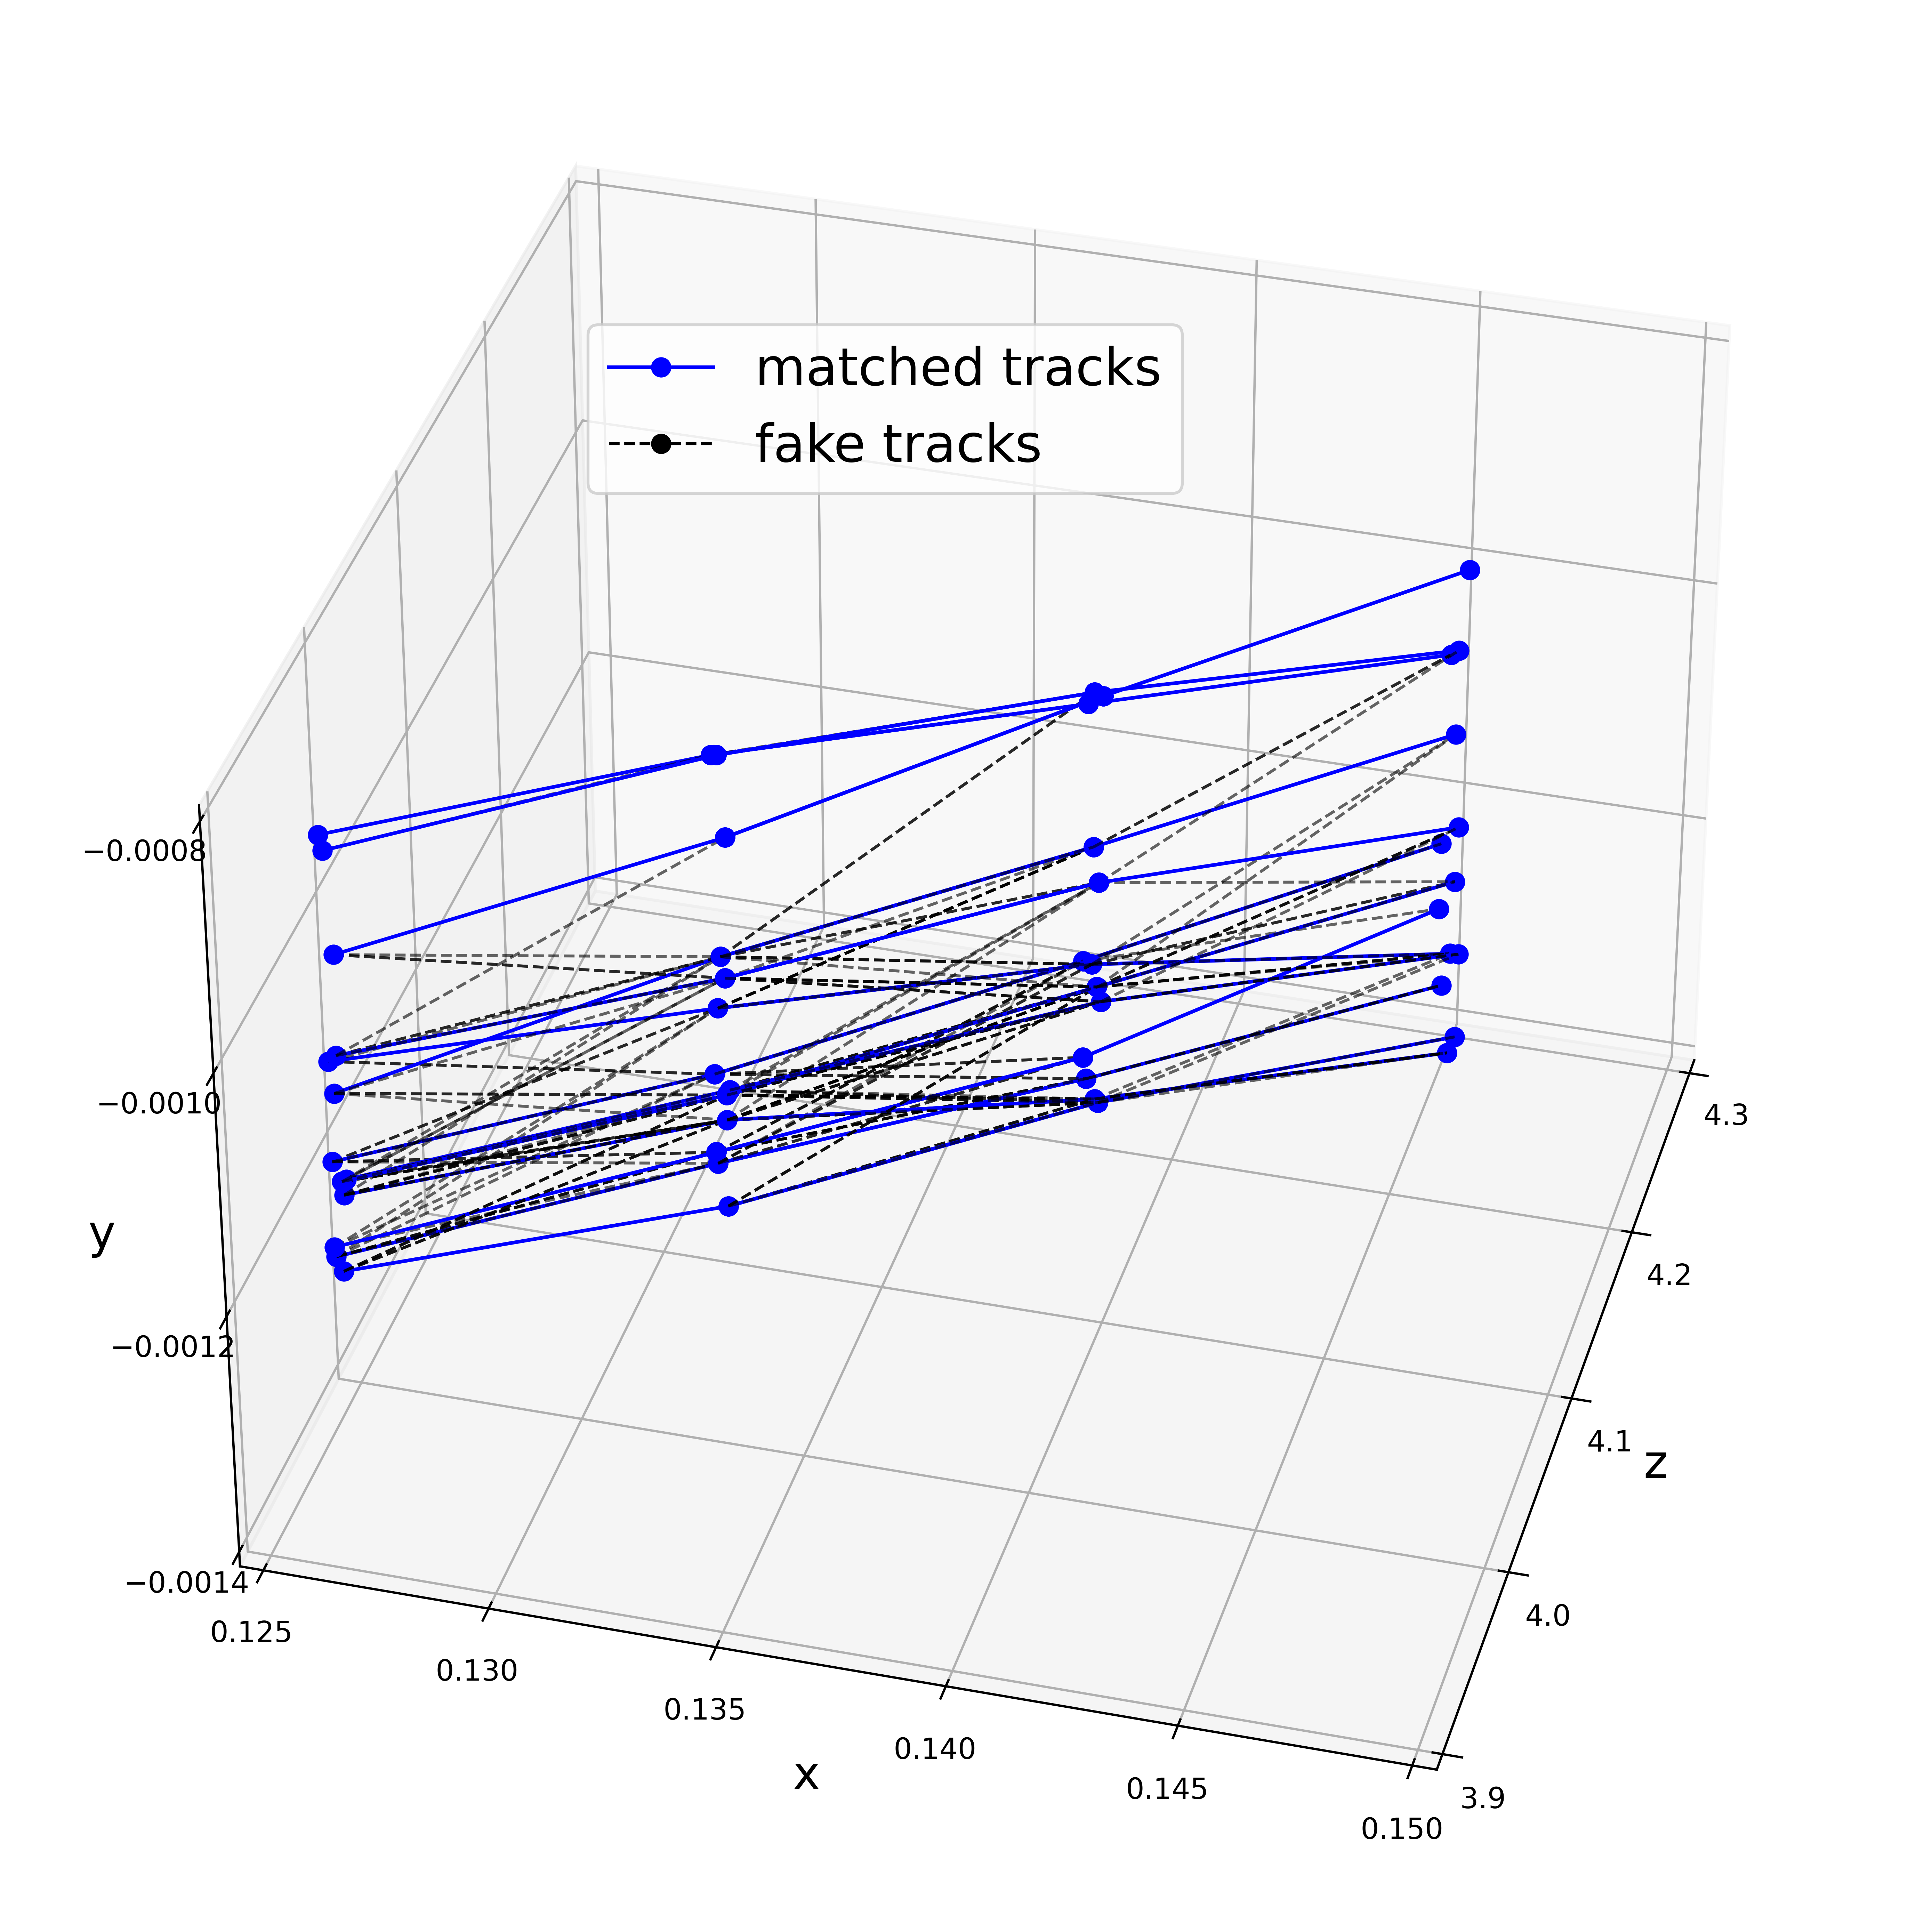

In [197]:
fig = plt.figure(figsize=(12, 12), dpi=600)
ax = fig.add_subplot(projection='3d')
ax.set_xlim(3.95, 4.3)  # for better visualisation switch x and z axis
ax.set_ylim(0.125, 0.15)
ax.set_zlim(-0.0008, -0.0014)
ax.view_init(-145, -15)
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("x", fontsize=16)
ax.set_zlabel("y", fontsize=16)
ax.set_xticks([3.9, 4.0, 4.1, 4.2, 4.3])
ax.set_yticks([0.125, 0.130, 0.135, 0.140, 0.145, 0.150])
ax.set_zticks([-8e-4, -10e-4, -12e-4, -14e-4])
for triplet in data:
    if triplet.is_correct_match:
        ax.plot([triplet.doublet_1.hit_1_position[0],
                 triplet.doublet_1.hit_2_position[0]],
                [triplet.doublet_1.hit_1_position[1],
                 triplet.doublet_1.hit_2_position[1]],
                [triplet.doublet_1.hit_1_position[2],
                 triplet.doublet_1.hit_2_position[2]],
                 zdir='x',
                 color='blue',
                 linewidth=1.25,
                 marker="o")
        ax.plot([triplet.doublet_2.hit_1_position[0],
                 triplet.doublet_2.hit_2_position[0]],
                [triplet.doublet_2.hit_1_position[1],
                 triplet.doublet_2.hit_2_position[1]],
                [triplet.doublet_2.hit_1_position[2],
                 triplet.doublet_2.hit_2_position[2]],
                 zdir='x',
                 color='blue',
                 linewidth=1.25,
                 marker="o")
    else:
        ax.plot([triplet.doublet_1.hit_1_position[0],
                 triplet.doublet_1.hit_2_position[0]],
                [triplet.doublet_1.hit_1_position[1],
                 triplet.doublet_1.hit_2_position[1]],
                [triplet.doublet_1.hit_1_position[2],
                 triplet.doublet_1.hit_2_position[2]],
                 zdir='x',
                 color='k',
                 alpha=0.6,
                 linestyle="--",
                 linewidth=1)
        ax.plot([triplet.doublet_2.hit_1_position[0],
                 triplet.doublet_2.hit_2_position[0]],
                [triplet.doublet_2.hit_1_position[1],
                 triplet.doublet_2.hit_2_position[1]],
                [triplet.doublet_2.hit_1_position[2],
                 triplet.doublet_2.hit_2_position[2]],
                 zdir='x',
                 color='k',
                 alpha=0.6,
                 linewidth=1,
                 linestyle="--")  
ax.plot([], [], label="matched tracks", marker="o", linewidth=1.25, color="blue")
ax.plot([], [], label="fake tracks", marker="o", linewidth=1, color="k", linestyle="--")
plt.legend(loc=(0.3,0.75), fontsize=18)
plt.savefig("13_tracks.pdf")
plt.savefig("13_tracks.jpg")